In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.arange(0, 20).reshape(-1, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [4]:
np.save("..\my_data", a)

In [ ]:
S11-knn -> current directory
"..\my_data"  # relative path

In [5]:
X = np.load("..\data\knn\classification\X_data.npy")
y = np.load("..\data\knn\classification\y_data.npy")

In [7]:
print(X.shape) # 500,2: 500 samples/entites, 2 features: 
print(y.shape) # 1d array, 500 values/true category corresponding toeach entity

(500, 2)
(500,)


In [10]:
# X[:,0]

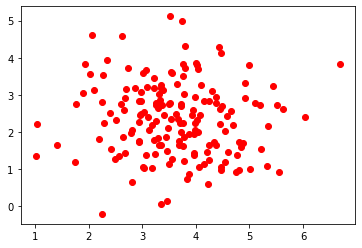

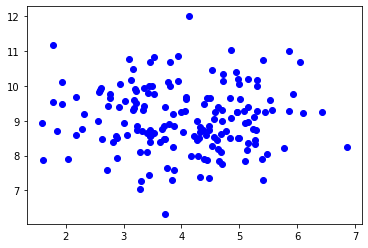

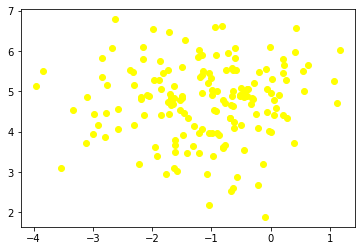

In [21]:
feature_1 = X[:,0] # plot on x axis
feature_2 = X[:,1] # plot on y axis

plt.scatter(feature_1[y==0], feature_2[y==0], c="red") # plotting entites whose category is 0
plt.show()
plt.scatter(feature_1[y==1], feature_2[y==1], c="blue")
plt.show()
plt.scatter(feature_1[y==2], feature_2[y==2], c="yellow")
plt.show()


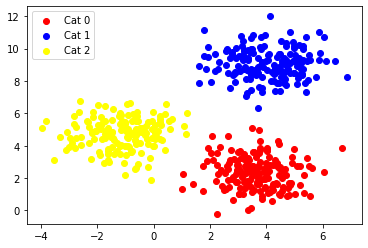

In [84]:
plt.scatter(feature_1[y==0], feature_2[y==0], c="red", label="Cat 0") # plotting entites whose category is 0: red
plt.scatter(feature_1[y==1], feature_2[y==1], c="blue", label="Cat 1") # 1:blue
plt.scatter(feature_1[y==2], feature_2[y==2], c="yellow", label="Cat 2") # 2:yellow
plt.legend()
plt.show()

In [32]:
# y[:10]
# ["yellow", "red", "red", "red", "red", "orange"]
# 0: red
# 1: orange
# 2: yellow

def get_color(y):
    colors = []
    for category in y:
        if category == 0:
            colors.append("red")
        elif category == 1:
            colors.append("orange")
        else: # category == 2
            colors.append("yellow")
    return colors

uni_cat = set(y)
print(uni_cat)

uni, count  = np.unique(y, return_counts=True)
print(uni, count)

{0, 1, 2}
[0 1 2] [167 167 166]


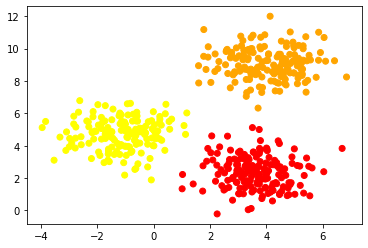

In [28]:
colors = get_color(y)
plt.scatter(feature_1, feature_2, c=colors)
plt.show()

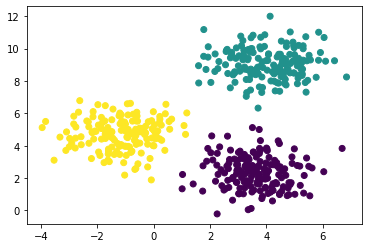

-3.541222446100469 3.1035610599349805 2


In [36]:
plt.scatter(feature_1, feature_2, c=y, cmap=plt.cm.viridis)
plt.show()
print(feature_1[0], feature_2[0], y[0])

# KNN Implementation
Aim: Given some training data (X, y), I have to predict the category of a new test_point (X)    
## Algo:
1. calculate the distance of test point from every data point in training data.    
2. sort my distances, such that corresponding indices are known   
3. Pick first k indices  
4. Get the category corresponding to k indices  
5. Count the no. of samples of each category in the k-nn  
6. Prediction = category with max count  

In [86]:
def distance(pt1, pt2):
    return ((pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)**0.5

def get_index(el):
    return el[0]

def predict(X, y, test_point, k=3):
    # compute distance from each training point
    distances = []
    for i in range(len(X)):
        d = (distance(X[i], test_point), i)
        distances.append(d)

    # sort the distances
    distances = sorted(distances, key=get_index)[:k]

    # get category corresponding to k indices
    knn_cat = []
    for el in distances:
        idx = el[1]
        cat = y[idx]
        knn_cat.append(cat)


    # count no. of samples corresponding to each category in knn_cat
    d = {} # cat: count, 
    for cat in knn_cat:
        if d.get(cat) == None: # cat not present in dict d
            d[cat] = 1
        else:
            d[cat] += 1
    # print(f"Category count in knn: {d}")
    
    # get the category with max count
    pred = [0, 0] # category, count
    for cat, count in d.items():
        if count > pred[1]:
            pred[0] = cat
            pred[1] = count
    
    # print(f"Predicted category: {pred[0]}, Confidence: {pred[1]/k}")
    return pred[0]
    
        

Category count in knn: {2: 166, 0: 167, 1: 167}
Predicted category: 0, Confidence: 0.334


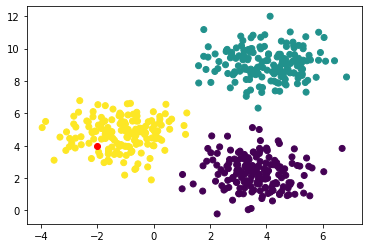

In [82]:
tp = [-2, 4]
# def predict(X, y, test_point, k=3):
predict(X, y, tp, 500)


plt.scatter(feature_1, feature_2, c=y)
plt.scatter(tp[0], tp[1], c="red")
plt.show()

## Decision Boundary

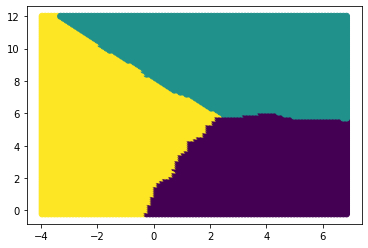

In [87]:
f1 = np.linspace(feature_1.min(), feature_1.max(), 100)
f2 = np.linspace(feature_2.min(), feature_2.max(), 100)

f1, f2 = np.meshgrid(f1, f2)

f1 = f1.flatten()
f2 = f2.flatten()

pred = []
for tp1, tp2 in zip(f1, f2):
    pred.append(predict(X, y, [tp1,tp2], k=3))

plt.scatter(f1, f2, c=pred)


In [92]:

a = np.array([1, 2, 3, 4])
b = np.array([1,2,3,4])

a, b = np.meshgrid(a,b)
print(a)
print(b)

a, b = a.flatten(), b.flatten()
print(a)
print(b)
print(a.shape, b.shape)

z = zip(a, b)
for pt in zip(a, b):
    print(pt)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4]
[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]
(16,) (16,)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


In [58]:
knn_cat = [0, 0, 0, 1, 2]

d= {}
for cat in knn_cat:
    if d.get(cat) == None: # cat not present in dict d
        d[cat] = 1
    else: # if cat already present in dict
        d[cat] += 1
print(d)

{0: 3, 1: 1, 2: 1}


In [63]:
if d.get(4) == None:
    d[4] = 1
else:
    d[4] += 1
print(d)


{0: 3, 1: 1, 2: 1, 4: 2}


In [57]:
a = [5, 4, 3, 2, 1]
# sorted(a) -> 1, 2, 3, 4 ,5
# ans: [4, 3, 2, 1, 0]



k = 3
a = [(5,0), (4,1), (3,2), (2,3), (1,4), (1, 5)]
a = sorted(a, key=get_index)[:k]

print(a)


[(1, 4), (1, 5), (2, 3)]


In [48]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [42]:
pt1 = X[0]
pt2 = [4,3]
distance(pt1, pt2)

7.541933497101681

In [39]:
print(X[0]) # pt1
tp = [4, 3]
print(tp) # pt2

(pt1[0]-pt2[0])**2 + (pt1[1]-pt2[1])**2)**0.5

[-3.54122245  3.10356106]
[4, 3]
